In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import trapezoid, simpson, quad_vec
import sys


## Zadanie 1
Na początku zdefiniowaliśmy funkcję podcałkową $\frac{4}{1+x^{2}}$ oraz skopiowaliśmy funkcje liczące kwadratury prostokątów, trapezów, Simpsona i Gaussa-Legendre’a z poprzedniego laboratorium. Następnie zdefiniowaliśmy funkcje liczące kwadratury adaptacyjne trapezów i Gaussa-Kronroda. W tym celu użyliśmy funkcji `scipy.integrate.quad_vec` z argumentami odpowiednio `quadrature='trapezoid'` i `quadrature='gk21'`, oraz z wartościami tolerancji $ eps=10^{0}...10^{-14} $. Wartość błędu bezwzględnego i ilość wywołań odczytaliśmy z dodatkowych informacji zawartych w strukturze zwracanej przez funkcję (odpowiednio `result[1]` i `result[-1].neval`). Otrzymane wyniki przedstawiliśmy na poniższym wykresie 1.

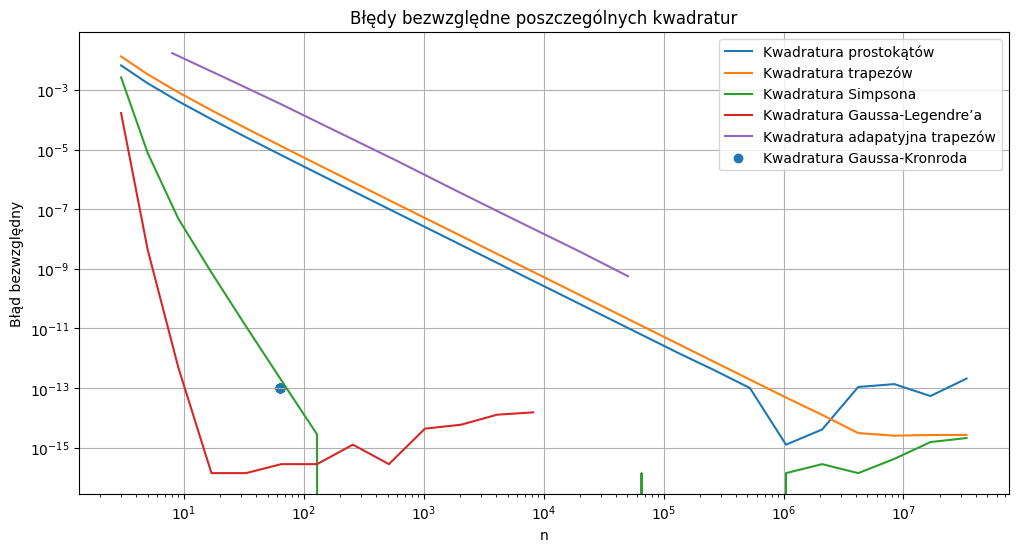

In [2]:
def f(x):
    return 4 / (1 + x ** 2)


real_integral_val = np.pi
a = 0
b = 1
width = b - a


def rect_integral(xs):
    s = 0
    for i in range(len(xs) - 1):
        dx = xs[i + 1] - xs[i]
        x = (xs[i] + xs[i + 1]) / 2
        s += f(x) * dx
    return s


def trap_integral(xs):
    return trapezoid(f(xs), xs)


def simps_integral(xs):
    return simpson(f(xs), xs)


def trap_adaptive_integral(epsrel):
    return quad_vec(f, a, b, epsrel=epsrel, quadrature='trapezoid', full_output=True)


def gauss_kronrod_integral(epsrel):
    return quad_vec(f, a, b, epsrel=epsrel, quadrature='gk21', full_output=True)


m_vec = np.arange(1, 26)
n_vec = 2 ** m_vec + 1
h_vec = width / n_vec


def calc_err(integral_fun, n):
    xs = np.linspace(a, b, n, dtype=np.double)
    vals = integral_fun(xs)
    return np.abs((vals - real_integral_val) / real_integral_val)


def calc_err_and_eval_adaptive(integral_fun, n):
    result = integral_fun(n)
    err = result[1]
    eval_count = result[-1].neval
    return err, eval_count


quad_err = np.array([calc_err(rect_integral, n) for n in n_vec])
trap_err = np.array([calc_err(trap_integral, n) for n in n_vec])
simps_err = np.array([calc_err(simps_integral, n) for n in n_vec])

adaptive_eps_vec = np.pow(0.1, np.arange(0, 15))

trap_adaptive_calc = [calc_err_and_eval_adaptive(trap_adaptive_integral, eps) for eps in adaptive_eps_vec]
trap_adaptive_err = [e for (e, _) in trap_adaptive_calc]
trap_adaptive_n_vec = [n for (_, n) in trap_adaptive_calc]

gauss_kronrod_calc = [calc_err_and_eval_adaptive(gauss_kronrod_integral, eps) for eps in adaptive_eps_vec]
gauss_kronrod_err = [e for (e, _) in gauss_kronrod_calc]
gauss_kronrod_n_vec = [n for (_, n) in gauss_kronrod_calc]
m_vec_gauss = np.arange(1, 14)
n_vec_gauss = 2 ** m_vec_gauss + 1
leggaus_vals = [np.polynomial.legendre.leggauss(m) for m in n_vec_gauss]
x_vec_gauss = [x_vec * 0.5 + 0.5 for (x_vec, _) in leggaus_vals]
w_vec_gauss = [y for (_, y) in leggaus_vals]
vals_gauss = np.array([np.sum(f(x) * 0.5 * w) for (x, w) in zip(x_vec_gauss, w_vec_gauss)])
gaus_err = np.abs((vals_gauss - real_integral_val) / real_integral_val)
plt.figure(figsize=(12, 6))
plt.title("Błędy bezwzględne poszczególnych kwadratur")
plt.loglog(n_vec, quad_err, label="Kwadratura prostokątów")
plt.loglog(n_vec, trap_err, label="Kwadratura trapezów")
plt.loglog(n_vec, simps_err, label="Kwadratura Simpsona")
plt.loglog(n_vec_gauss, gaus_err, label="Kwadratura Gaussa-Legendre’a")
plt.loglog(trap_adaptive_n_vec, trap_adaptive_err, label="Kwadratura adapatyjna trapezów")
plt.scatter(gauss_kronrod_n_vec, gauss_kronrod_err, label="Kwadratura Gaussa-Kronroda")
plt.xlabel('n')
plt.ylabel('Błąd bezwzględny')
plt.legend()
plt.grid(True)
plt.show()